In [3]:
import pdfplumber

# File path
file_path = r"C:\Users\jamar\Downloads\US.FdiFlowsStock_20241126_014846.pdf"

# Open and extract text from the PDF
with pdfplumber.open(file_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        print(f"--- Page {page_number} ---")
        print(page.extract_text())

--- Page 1 ---
US.FdiFlowsStock_20241126_014846
Economy_Label,1990_US_at_current_prices_in_millions_Value,1990_US_at_current_prices_F
ootnote,1990_US_at_current_prices_MissingValue,1991_US_at_current_prices_in_millions_Val
ue,1991_US_at_current_prices_Footnote,1991_US_at_current_prices_MissingValue,1992_US_
at_current_prices_in_millions_Value,1992_US_at_current_prices_Footnote,1992_US_at_curren
t_prices_MissingValue,1993_US_at_current_prices_in_millions_Value,1993_US_at_current_pri
ces_Footnote,1993_US_at_current_prices_MissingValue,1994_US_at_current_prices_in_millio
ns_Value,1994_US_at_current_prices_Footnote,1994_US_at_current_prices_MissingValue,199
5_US_at_current_prices_in_millions_Value,1995_US_at_current_prices_Footnote,1995_US_at
_current_prices_MissingValue,1996_US_at_current_prices_in_millions_Value,1996_US_at_curr
ent_prices_Footnote,1996_US_at_current_prices_MissingValue,1997_US_at_current_prices_in
_millions_Value,1997_US_at_current_prices_Footnote,1997_US_at_current_pric

In [19]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\jamar\Downloads\US.FdiFlowsStock_20241126_014846.csv"
df = pd.read_csv(file_path)

# Cleaning the dataset
# 1. Remove columns related to footnotes and missing values
cleaned_df = df.loc[:, ~df.columns.str.contains('Footnote|MissingValue')]

# 2. Rename columns for better readability
cleaned_df.columns = cleaned_df.columns.str.replace('_at_current_prices_in_millions_Value', '_Value')
cleaned_df.columns = cleaned_df.columns.str.replace('US_', '')

# 3. Drop rows with excessive missing values (optional threshold: 50% missing)
cleaned_df = cleaned_df.dropna(thresh=int(0.5 * cleaned_df.shape[1]))

# 4. Fill remaining missing values using forward fill (ffill method)
cleaned_df.ffill(inplace=True)

# 5. Ensure proper data types for numeric columns
for col in cleaned_df.columns:
    if 'Value' in col:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Reshape the data to long format where each country is next to its label
df_melted = cleaned_df.melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Group by country and display their corresponding values
df_grouped_by_country = df_melted.groupby('Economy_Label')

# Print the values categorized by country
for country, group in df_grouped_by_country:
    print(f"\nData for {country}:")
    print(group[['Year', 'Value']])


Data for Africa:
            Year    Value
1     1990_Value    658.0
84    1991_Value   1336.0
167   1992_Value   2385.0
250   1993_Value    576.0
333   1994_Value   1912.0
416   1995_Value   2976.0
499   1996_Value   1817.0
582   1997_Value   3557.0
665   1998_Value   1619.0
748   1999_Value   2603.0
831   2000_Value   1548.0
914   2001_Value  -2639.0
997   2002_Value    368.0
1080  2003_Value   1377.0
1163  2004_Value   2961.0
1246  2005_Value   2011.0
1329  2006_Value   8186.0
1412  2007_Value  10827.0
1495  2008_Value   9954.0
1578  2009_Value   6374.0
1661  2010_Value  10399.0
1744  2011_Value   5318.0
1827  2012_Value  10527.0
1910  2013_Value  11032.0
1993  2014_Value  10523.0
2076  2015_Value   9607.0
2159  2016_Value   8410.0
2242  2017_Value  11233.0
2325  2018_Value   7899.0
2408  2019_Value   5122.0
2491  2020_Value   2465.0
2574  2021_Value   5144.0
2657  2022_Value   9232.0
2740  2023_Value     61.0

Data for Americas:
            Year     Value
2     1990_Value   37582.

C:\Users\jamar\AppData\Local\Temp\ipykernel_20980\1157499722.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


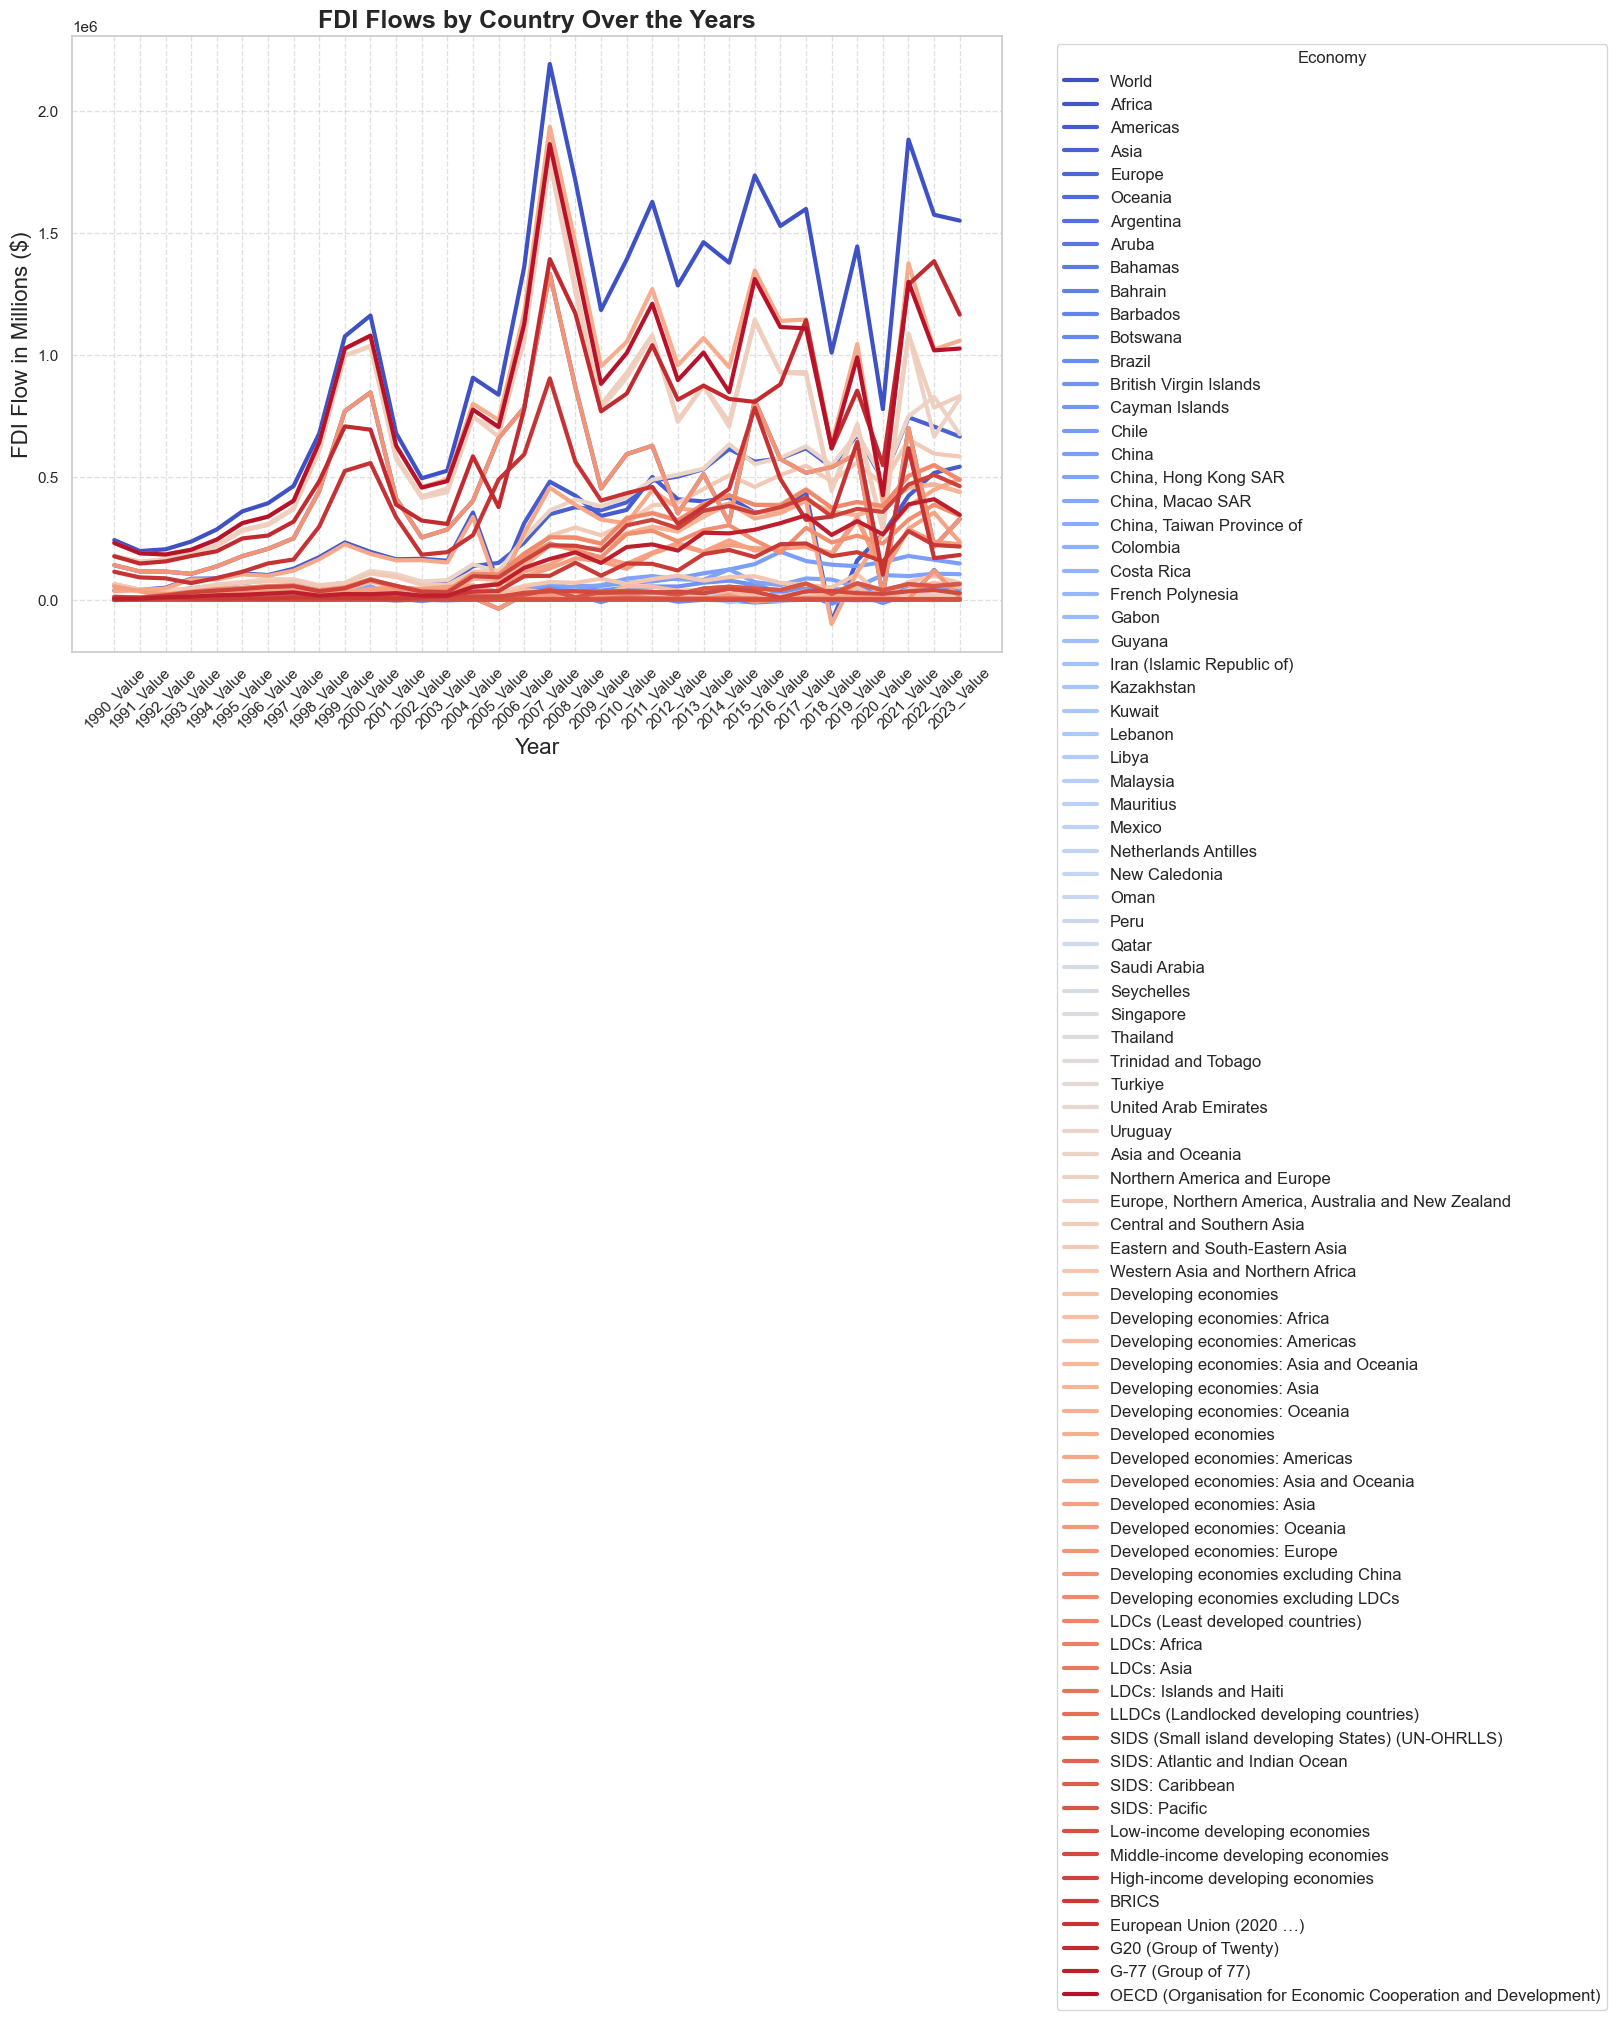

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the dataset
df = df.loc[:, ~df.columns.str.contains('Footnote|MissingValue')] \
    .rename(columns=lambda x: x.replace('_at_current_prices_in_millions_Value', '_Value').replace('US_', '')) \
    .dropna(thresh=int(0.5 * df.shape[1])).ffill().melt(id_vars=["Economy_Label"], var_name="Year", value_name="Value")

# Plot the data with gradient and formatting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Value', hue='Economy_Label', palette='coolwarm', linewidth=3)

# Customize plot
plt.title('FDI Flows by Country Over the Years', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('FDI Flow in Millions ($)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Economy', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()